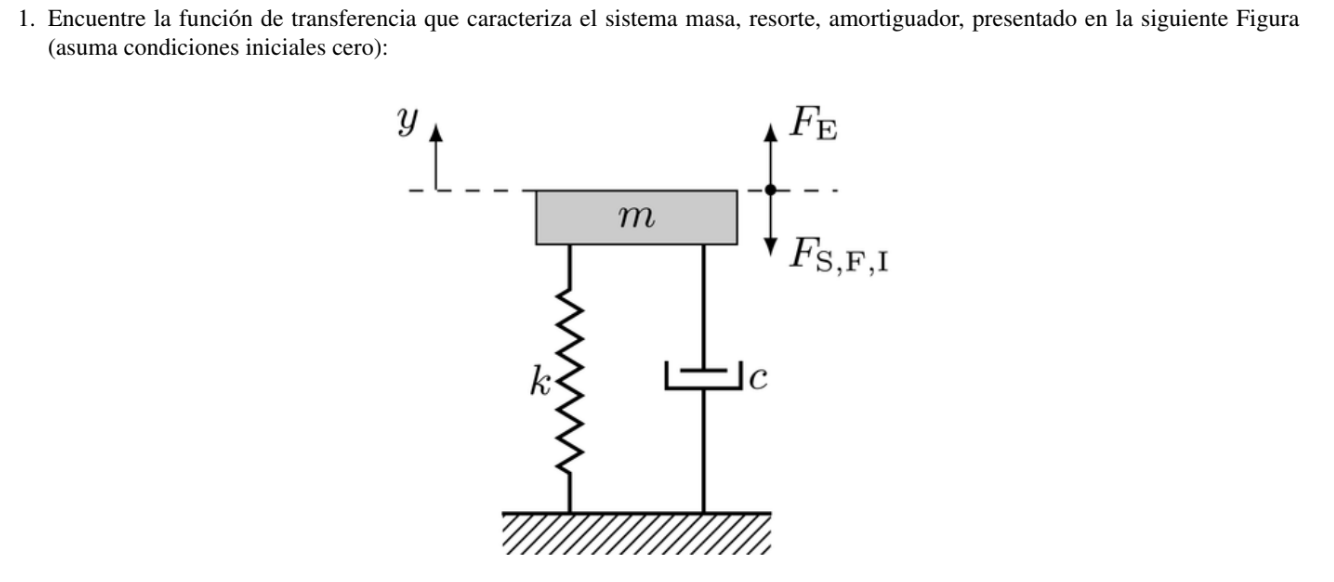

#Solucion

teniendo en cuenta el diagrama tenemos en cuenta que $y = F_E$ que es la fuerza hacia el exterior, por ende entendemos que $F_E$ es la salida de nuestro sistema y nuestra entrada es la fuerza aplicada $F_S$, para evitar confuciones usaremos $y$ para la salida y $F(t)$ para la entrada.

entonces:

\begin{equation}
  y(t) = ma + kx + cv
\end{equation}

sabemos que si tenemos una distancia X su velocidad esta dada por: $\frac{d}{dt}(x)$ y su aceleracion por $\frac{d^2}{dt}(x)$

conociendo eso podemos decir que:

\begin{equation}
  y(t) = m\frac{d^2x(t)}{dt} + c\frac{d(t)}{dt}+ Kx(t)
\end{equation}

si se pasa al dominio de laplace se puede resolver mas facilmente:

\begin{equation}
  y(t) = mS^2X(S^2) + cSX(S)+ KX(S)
\end{equation}

pero $x(t)$ realmente es nuestro $y(t)$ por ende factorizando y pasando al otro lado es:

\begin{equation}
  H(S) = \frac{1}{mS^2 + cS+ K}
\end{equation}


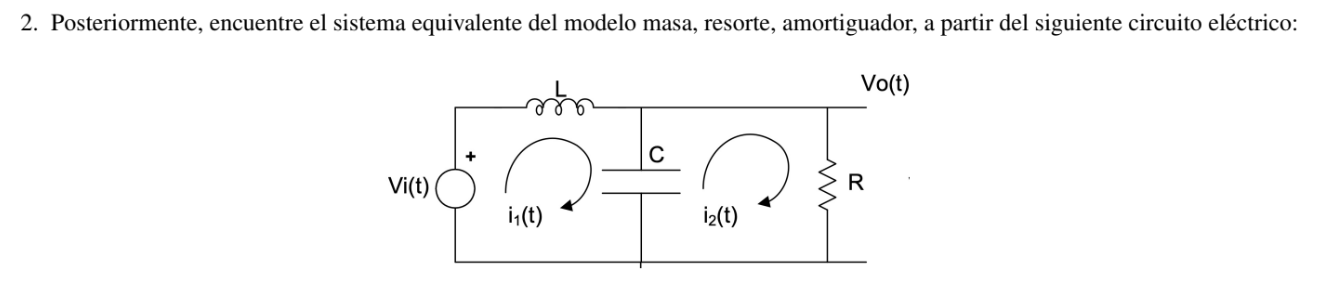

Para resolver esto usaremos las equivalentes a impedancia de los elementos por ende:



Aplicamos la Ley de Kirchhoff de Corrientes (LKC) en el nodo intermedio:

\begin{equation}
I_1(s) = I_2(s) + \frac{V_o(s)}{R}.
\end{equation}

Sustituyendo las corrientes en términos de impedancias:

\begin{equation}
\frac{V_i(s) - V_o(s)}{sL} = sC V_o(s) + \frac{V_o(s)}{R}.
\end{equation}

Multiplicamos ambos lados por $ sL $:

\begin{equation}
V_i(s) - V_o(s) = s^2 LC V_o(s) + \frac{sL}{R} V_o(s).
\end{equation}

Factorizamos $ V_o(s) $:

\begin{equation}
V_i(s) = V_o(s) \left( 1 + s^2 LC + \frac{sL}{R} \right).
\end{equation}

Finalmente, despejamos la función de transferencia y la comparamos :

\begin{equation}
H(s) = \frac{V_o(s)}{V_i(s)} = \frac{1}{1 + s^2 LC + \frac{sL}{R}} = \frac{1}{mS^2 + cS+ K}
\end{equation}

facilmente se puede imaginar o inferir que:

\begin{equation}
  m = LC
\end{equation}

\begin{equation}
  k = 1
\end{equation}

\begin{equation}
  c = \frac{S}{R}
\end{equation}




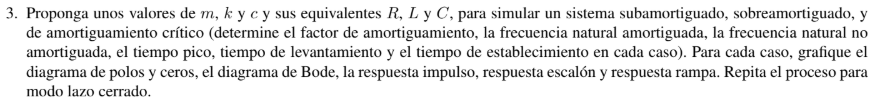

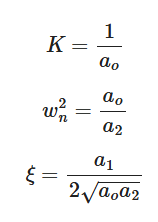

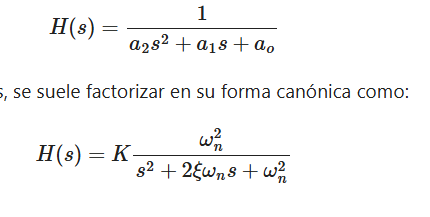

\begin{equation}
H(s) = \frac{V_o(s)}{V_i(s)} = \frac{1}{1 + s^2 LC + \frac{sL}{R}} = \frac{1}{mS^2 + cS+ K}
\end{equation}

#RESULTADOS - SUBAMORTIGUADOS


In [100]:
!pip install sympy --upgrade -q

In [101]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t,R, L, C, M, A, KR = sym.symbols('t R L C M A KR', positive=True, real=True)

#Entrada de interés en Laplace
X = 1 # X(s) = 1 Respuesta entrada impulso; X(s) = 1/s resp escalón, X(s) = 1/s**2 resp a la rampa
#Forma canónica -> resolver según sistema propuesto
K = 1 #ganancia estática
wn = sym.sqrt(1/(C*L)) #frecuencia natural
xi = (L/R)/(2*sym.sqrt(1*L*C)) #factor amortiguamiento
H = K*1/((1+(s**2)*(L*C)+s*(L/R))) #función de transferencia en lazo cerrado slit 2 orden
xi1 = A/2*sym.sqrt(KR*M)
wn1 = sym.sqrt(KR/M)
h1 = 1/((M*s**2)+(A*s)+KR)
#Hlc = H/(1+H) #para lazo cerrado
H

       1        
────────────────
     2   L⋅s    
C⋅L⋅s  + ─── + 1
          R     

In [102]:
h1.apart(s)

       1       
───────────────
              2
A⋅s + KR + M⋅s 

In [103]:
H.apart(s)

        R         
──────────────────
       2          
C⋅L⋅R⋅s  + L⋅s + R

In [104]:
#evaluar valores RLC
RLC = {R: 1, L: sym.Rational('0.8'), C: sym.Rational('0.5')}#valores utilizados para la simulación
MAK = {M: 1, A: 1, KR: 1}
h1.subs(MAK).apart(s)
H.subs(RLC).apart(s)

      5       
──────────────
   2          
2⋅s  + 4⋅s + 5

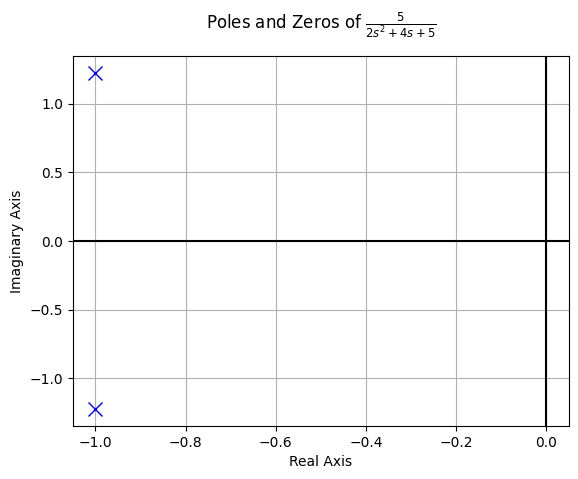

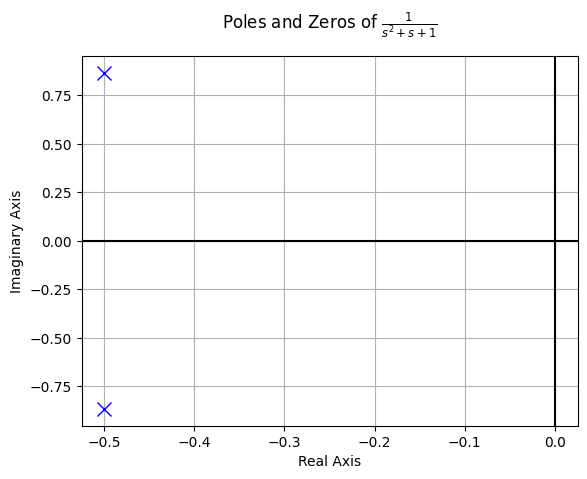

In [105]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(RLC).apart(s))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

num,den=sym.fraction(h1.subs(MAK).apart(s))

tf2 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf2)

In [106]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
Y2 = h1 * 1 #función de transferencia del circuito multiplicada por X(s)
#Función de salida
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Y2 = Y2.subs(MAK).apart(s)
#salida según entrada de interés
Y2

    1     
──────────
 2        
s  + s + 1

In [107]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(RLC).apart(s)
Ye


      5       
──────────────
   2          
2⋅s  + 4⋅s + 5

In [108]:
P = sym.inverse_laplace_transform(Y2,s, t)
P

      -t           
      ───          
       2     ⎛√3⋅t⎞
2⋅√3⋅ℯ   ⋅sin⎜────⎟
             ⎝ 2  ⎠
───────────────────
         3         

In [109]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

    -t    ⎛√6⋅t⎞
√6⋅ℯ  ⋅sin⎜────⎟
          ⎝ 2  ⎠
────────────────
       6        

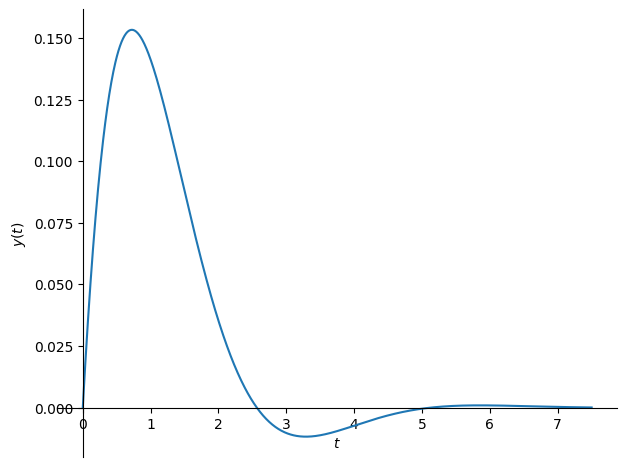

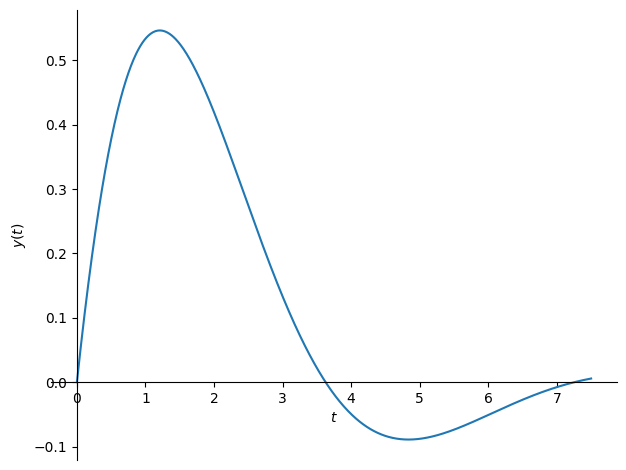

xita 0.632455532033676
xita 1/2


In [110]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((3/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
plt.show()

sym.plot(P,(t,0,float((3/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
plt.show()
print(f"xita",xi.subs(RLC).evalf())
print(f"xita",xi1.subs(MAK).apart(s))

#OSCILATORIO

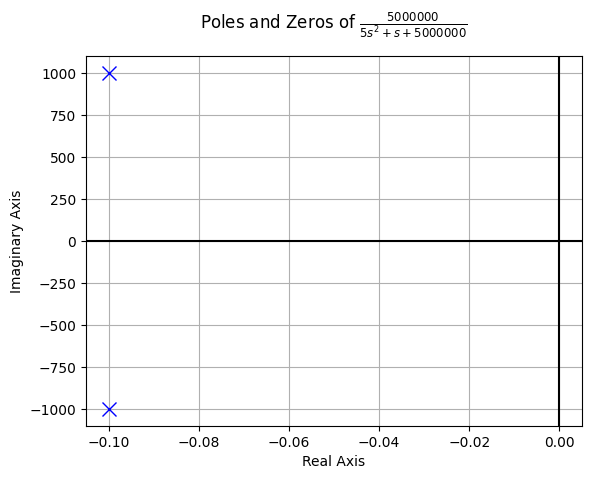

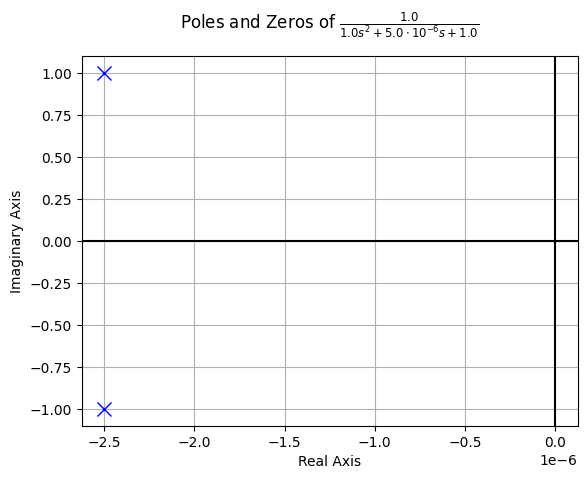

In [127]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t,R, L, C, M, A, KR = sym.symbols('t R L C M A KR', positive=True, real=True)

#Entrada de interés en Laplace
X = 1 # X(s) = 1 Respuesta entrada impulso; X(s) = 1/s resp escalón, X(s) = 1/s**2 resp a la rampa
#Forma canónica -> resolver según sistema propuesto
K = 1 #ganancia estática
wn = sym.sqrt(1/(C*L)) #frecuencia natural
xi = (L/R)/(2*sym.sqrt(1*L*C)) #factor amortiguamiento
H = K*1/((1+(s**2)*(L*C)+s*(L/R))) #función de transferencia en lazo cerrado slit 2 orden
xi1 = A/2*sym.sqrt(KR*M)
wn1 = sym.sqrt(KR/M)
h1 = 1/((M*s**2)+(A*s)+KR)
#Hlc = H/(1+H) #para lazo cerrado

#evaluar valores RLC
RLC = {R: 100, L: sym.Rational('0.00002'), C: sym.Rational('0.05')}#valores utilizados para la simulación
MAK = {M: 1, A: 0.000005, KR: 1}
h1.subs(MAK).apart(s)
H.subs(RLC).apart(s)

#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(RLC).apart(s))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

num,den=sym.fraction(h1.subs(MAK).apart(s))

tf2 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf2)

In [128]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
Y2 = h1 * 1 #función de transferencia del circuito multiplicada por X(s)
#Función de salida
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Y2 = Y2.subs(MAK).apart(s)
#salida según entrada de interés
Y2

          1.0          
───────────────────────
     2                 
1.0⋅s  + 5.0e-6⋅s + 1.0

In [129]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(RLC).apart(s)
Ye


     5000000      
──────────────────
   2              
5⋅s  + s + 5000000

In [130]:
P = sym.inverse_laplace_transform(Y2,s, t)
P

                  -2.5e-6⋅t                         
1.00000000000313⋅ℯ         ⋅sin(0.999999999996875⋅t)

In [131]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

             -t                    
             ───                   
             10     ⎛3⋅√11111111⋅t⎞
2⋅√11111111⋅ℯ   ⋅sin⎜─────────────⎟
                    ⎝     10      ⎠
───────────────────────────────────
             33333333              

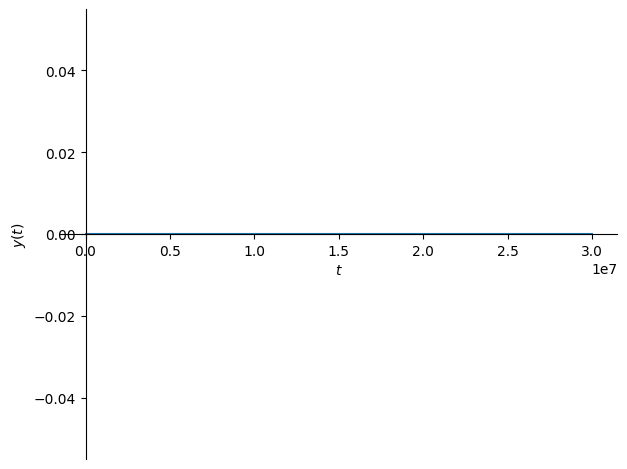

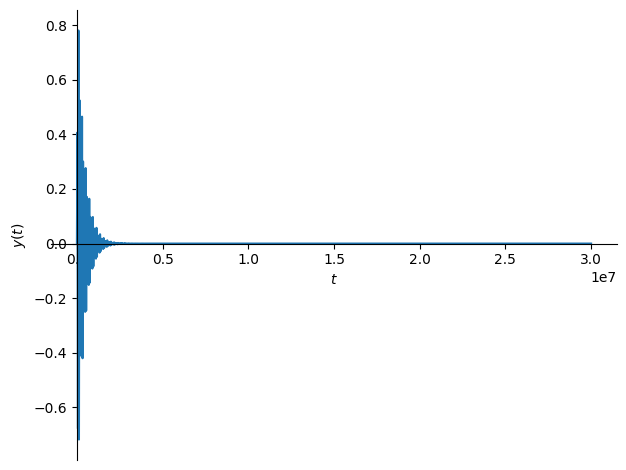

xita 0.000100000000000000
xita 2.50000000000000e-6


In [132]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((3/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
#plt.show()

sym.plot(P,(t,0,float((3/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
plt.show()
print(f"xita",xi.subs(RLC).evalf())
print(f"xita",xi1.subs(MAK).apart(s))

#Críticamente amortiguado:



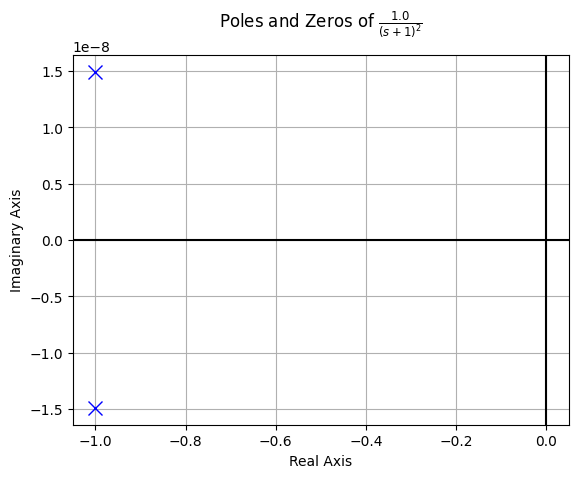

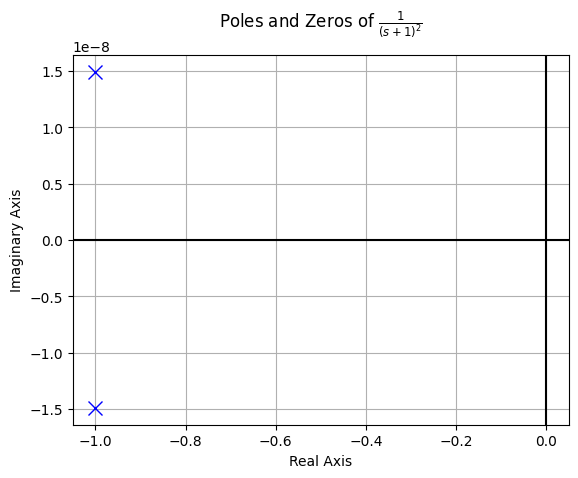

In [151]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t,R, L, C, M, A, KR = sym.symbols('t R L C M A KR', positive=True, real=True)

#Entrada de interés en Laplace
X = 1 # X(s) = 1 Respuesta entrada impulso; X(s) = 1/s resp escalón, X(s) = 1/s**2 resp a la rampa
#Forma canónica -> resolver según sistema propuesto
K = 1 #ganancia estática
wn = sym.sqrt(1/(C*L)) #frecuencia natural
xi = (L/R)/(2*sym.sqrt(1*L*C)) #factor amortiguamiento
H = K*1/((1+(s**2)*(L*C)+s*(L/R))) #función de transferencia en lazo cerrado slit 2 orden
xi1 = A/2*sym.sqrt(KR*M)
wn1 = sym.sqrt(KR/M)
h1 = 1/((M*s**2)+(A*s)+KR)
#Hlc = H/(1+H) #para lazo cerrado

#evaluar valores RLC
RLC = {R: 0.5, L: sym.Rational('1'), C: sym.Rational('1')}#valores utilizados para la simulación
MAK = {M: 1, A: 2, KR: 1}
h1.subs(MAK).apart(s)
H.subs(RLC).apart(s)

#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(RLC).apart(s))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

num,den=sym.fraction(h1.subs(MAK).apart(s))

tf2 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf2)

In [152]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
Y2 = h1 * 1 #función de transferencia del circuito multiplicada por X(s)
#Función de salida
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Y2 = Y2.subs(MAK).apart(s)
#salida según entrada de interés
Y2

   1    
────────
       2
(s + 1) 

In [153]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(RLC).apart(s)
Ye


  1.0   
────────
       2
(s + 1) 

In [154]:
P = sym.inverse_laplace_transform(Y2,s, t)
P

   -t
t⋅ℯ  

In [155]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

   -t
t⋅ℯ  

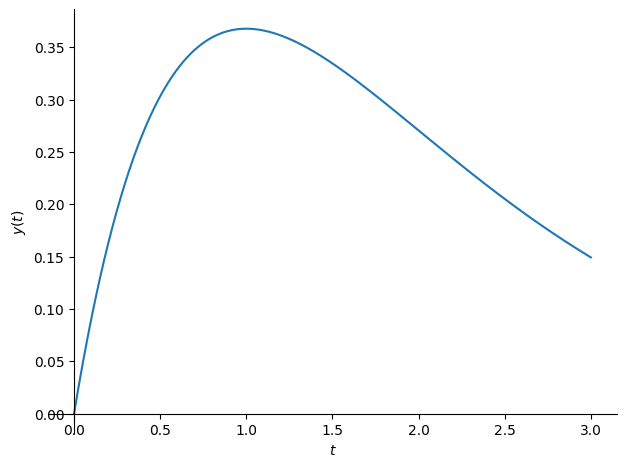

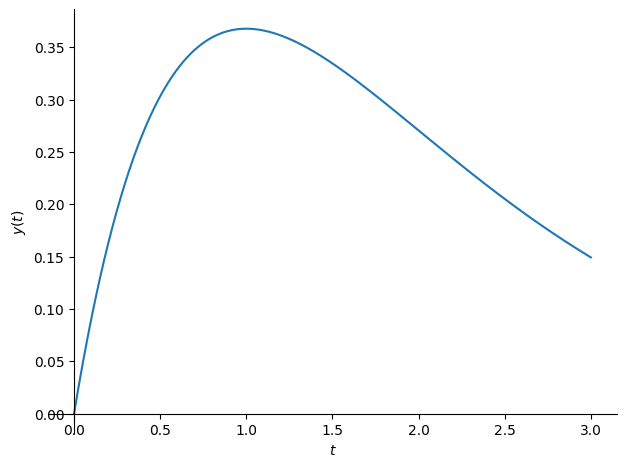

xita 1.00000000000000
xita 1


In [156]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((3/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
#plt.show()

sym.plot(P,(t,0,float((3/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
plt.show()
print(f"xita",xi.subs(RLC).evalf())
print(f"xita",xi1.subs(MAK).apart(s))